In [54]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
piramide_chile_INE = { # INE - Proyección base 2017
    '>=70': 1_614_364,
    '60-69': 1_857_879,
    '50-59': 2_392_614,
    '40-49': 2_658_453,
    '<=39': 11_155_053,
}


In [79]:
dosis2 = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto78/vacunados_edad_fecha_2daDosis_std.csv', parse_dates=[1],)
bins = [0, 40, 50, 60, 70, 999]
labels = ['<=39', '40-49', '50-59', '60-69', '>=70']
dosis2['agerange'] = pd.cut(dosis2.Edad, bins, labels=labels, include_lowest=True, right=False)
dosis2 = pd.pivot_table(dosis2, values=['Segunda Dosis'], index=['Fecha'],
                    columns=['agerange'], aggfunc=np.sum)['Segunda Dosis']
monodosis = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto78/vacunados_edad_fecha_UnicaDosis_std.csv', parse_dates=[1],)
monodosis['agerange'] = pd.cut(monodosis.Edad, bins, labels=labels, include_lowest=True, right=False)
monodosis = pd.pivot_table(monodosis, values=['Unica Dosis'], index=['Fecha'],
                    columns=['agerange'], aggfunc=np.sum)['Unica Dosis']
monodosis.sum()

agerange
<=39     286887.0
40-49     37808.0
50-59     20900.0
60-69      1153.0
>=70         88.0
dtype: float64

In [89]:
esquema_completo = dosis2.shift(14) + monodosis.shift(28)
esquema_completo = esquema_completo.cumsum().dropna()
p_esquema_completo = esquema_completo.copy()
p_esquema_completo['>=70'] = p_esquema_completo['>=70']/piramide_chile_INE['>=70']*100
p_esquema_completo['60-69'] = p_esquema_completo['60-69']/piramide_chile_INE['60-69']*100
p_esquema_completo['50-59'] = p_esquema_completo['50-59']/piramide_chile_INE['50-59']*100
p_esquema_completo['40-49'] = p_esquema_completo['40-49']/piramide_chile_INE['40-49']*100
p_esquema_completo['<=39'] = p_esquema_completo['<=39']/piramide_chile_INE['<=39']*100
esquema_completo

agerange,<=39,40-49,50-59,60-69,>=70
Fecha,,,,,
2021-01-21,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-22,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-23,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-24,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-25,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
2021-06-21,17.042761,60.595993,80.103686,84.815642,86.846895
2021-06-22,17.579863,61.867673,80.392951,84.940300,86.913051
2021-06-23,18.143016,62.897745,80.667253,85.059522,86.972393


('es_CL', 'UTF-8')


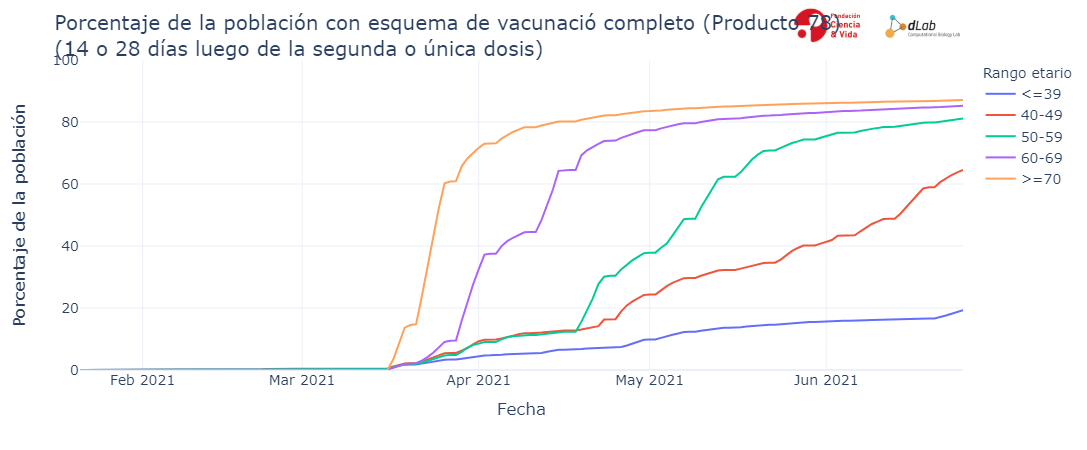

In [81]:
etiquetas = {
    'value': 'Porcentaje de la población',
    'agerange': 'Rango etario'
}
pl_esq_com = px.line(p_esquema_completo, labels=etiquetas)
pl_esq_com.update_layout(title_text="Porcentaje de la población con esquema de vacunació completo (Producto 78)<br>(14 o 28 días luego de la segunda o única dosis)")
pl_esq_com.update_yaxes(range=[0,100],)
pl_esq_com.update_layout(hovermode='x')
pl_esq_com.update_traces(
    hovertemplate="<br>".join([
#         "Día: %{x}",
        "%{y:.1f}%",
    ])
)
pl_esq_com.update_layout(template='plotly_white')
# pl_vac_tot.update_layout(yaxis_tickformat = ',.1f')
pl_esq_com.update_layout(
    font=dict(
        size=14,
    )
)
pl_esq_com.add_layout_image(
    dict(
        source="https://i2.wp.com/dlab.cl/wp-content/uploads/2016/08/LogoWebDlab.png",
        xref="paper", yref="paper",
        x=1, y=1.05,
        sizex=0.2, sizey=0.2,
        xanchor="right", yanchor="bottom"
    )
)


In [86]:
esquema_completo

agerange,<=39,40-49,50-59,60-69,>=70
Fecha,,,,,
2021-01-21,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-22,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-23,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-24,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-25,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
2021-06-21,17.042761,60.595993,80.103686,84.815642,86.846895
2021-06-22,17.579863,61.867673,80.392951,84.940300,86.913051
2021-06-23,18.143016,62.897745,80.667253,85.059522,86.972393
